# Image Enhancement using math operations

- we perform image enhancement using the math operaions.

- enhanced image can be achieved with basic operations _sometimes_.

- basic operations:

    - airthmetic operations like addition, multiplication
    - thresholding and masking,
    - bitwise like OR, AND, XOR.

## Libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Download data

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

## Original image

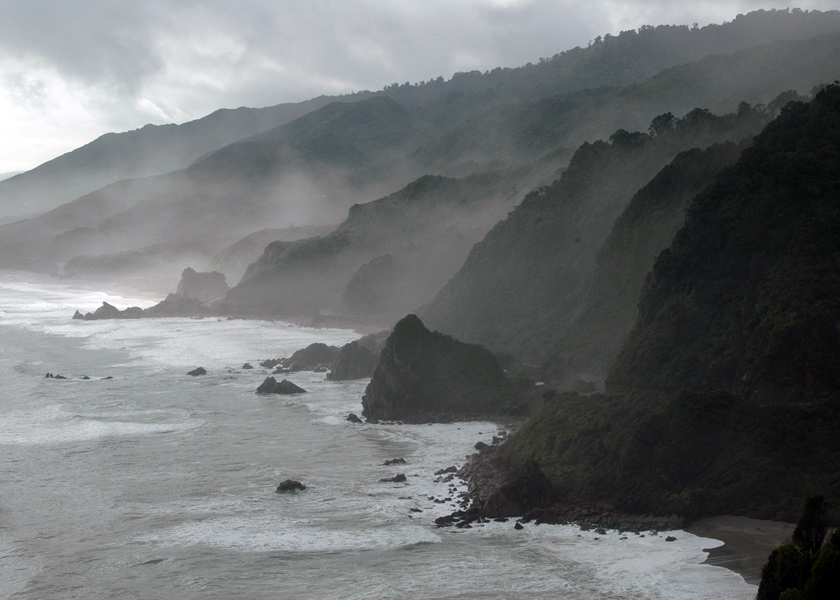

In [2]:
coast_img = cv.imread('New_Zealand_Coast.jpg', 1)
coast_img_rgb = cv.cvtColor(coast_img, cv.COLOR_BGR2RGB)

Image(filename='New_Zealand_Coast.jpg')

## Addition/ Increase or Decrease Brightness.

In [6]:
brightness_kernel = np.ones(coast_img_rgb.shape, dtype='uint8')*50

# increase brightness by adding the kernel to the image.
coast_img_bright = cv.add(coast_img_rgb, brightness_kernel)

# decreases brightness by subtracting the kernel to the image.
coast_img_dark = cv.subtract(coast_img_rgb, brightness_kernel)

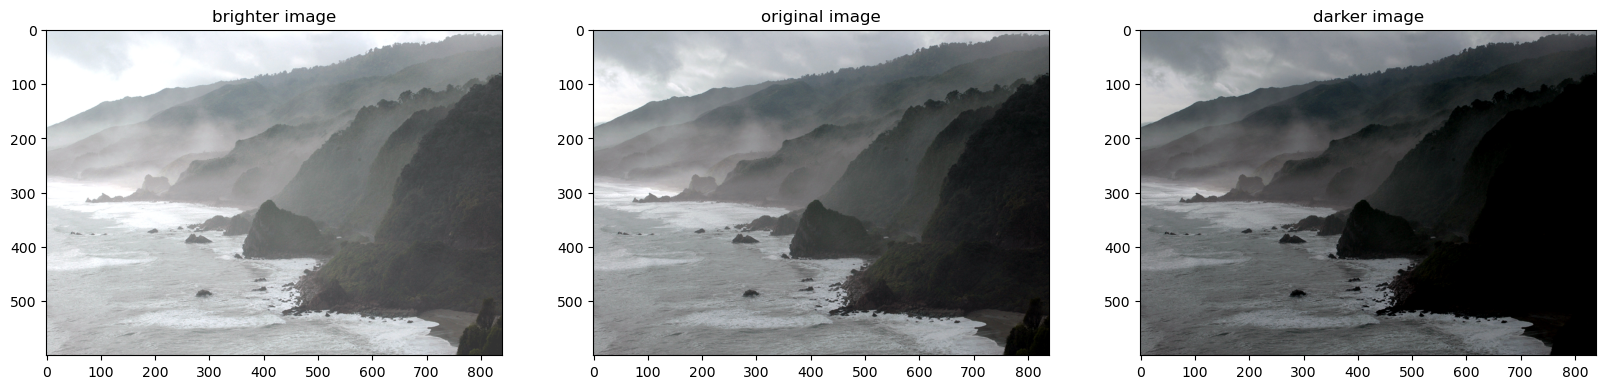

In [7]:
fig,ax = plt.subplots(1,3, figsize=[20,5])

ax[0].imshow(coast_img_bright)
ax[0].set_title('brighter image')
ax[1].imshow(coast_img_rgb)
ax[1].set_title('original image')
ax[2].imshow(coast_img_dark)
ax[2].set_title('darker image')

plt.show()

## Multiplication/ Contrast

- multiplication is used to improve the contrast of the image.

- contrast is the difference in the intensity values of pixels of an image. using multiplication operator we can increase/decrease the contrast.


In [10]:
lower_contrast_kernel = np.ones(coast_img_rgb.shape)*0.6
add_contrast_kernel = np.ones(coast_img_rgb.shape)*1.1

low_contrast_img = np.uint8(cv.multiply(np.float64(coast_img_rgb), lower_contrast_kernel))
high_contrast_img = np.uint8(cv.multiply(np.float64(coast_img_rgb), add_contrast_kernel))

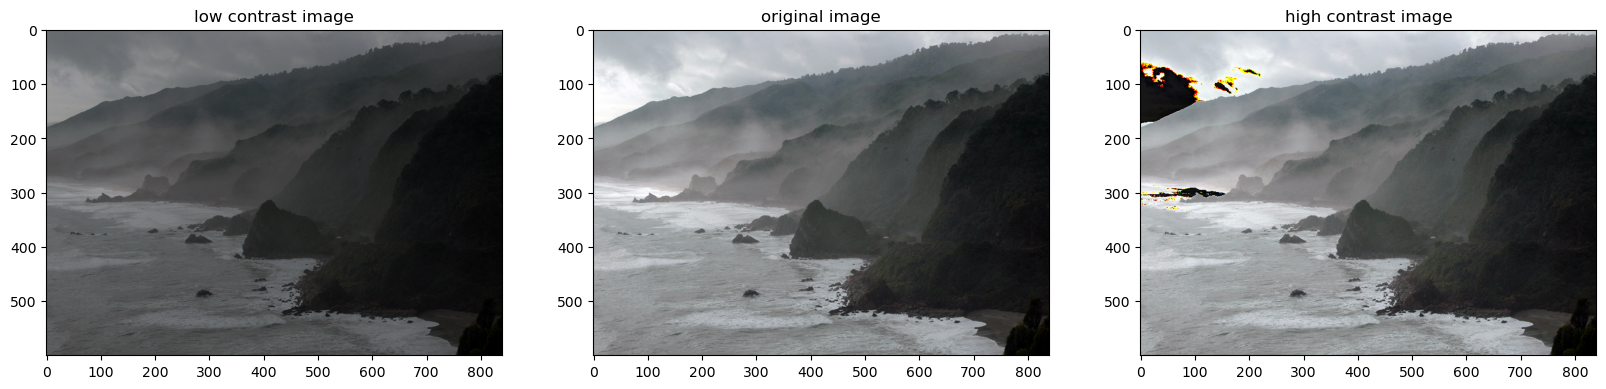

In [11]:
fig,ax = plt.subplots(1,3, figsize=[20,5])

ax[0].imshow(low_contrast_img)
ax[0].set_title('low contrast image')
ax[1].imshow(coast_img_rgb)
ax[1].set_title('original image')
ax[2].imshow(high_contrast_img)
ax[2].set_title('high contrast image')

plt.show()

in the high contrast image the clouds appear to be dark/black color, which is due the multiplication of pixels in that area exceeds the 255 value, and roll over to 0 because of np.uint8 conversion. like the out of range/overflow of the uint8.

### handling the dark areas.

In [12]:
# low_contrast_img1 = np.uint8(cv.multiply(np.float64(coast_img_rgb), lower_contrast_kernel))
high_contrast_img1 = np.uint8(np.clip(cv.multiply(np.float64(coast_img_rgb), add_contrast_kernel),0,255))

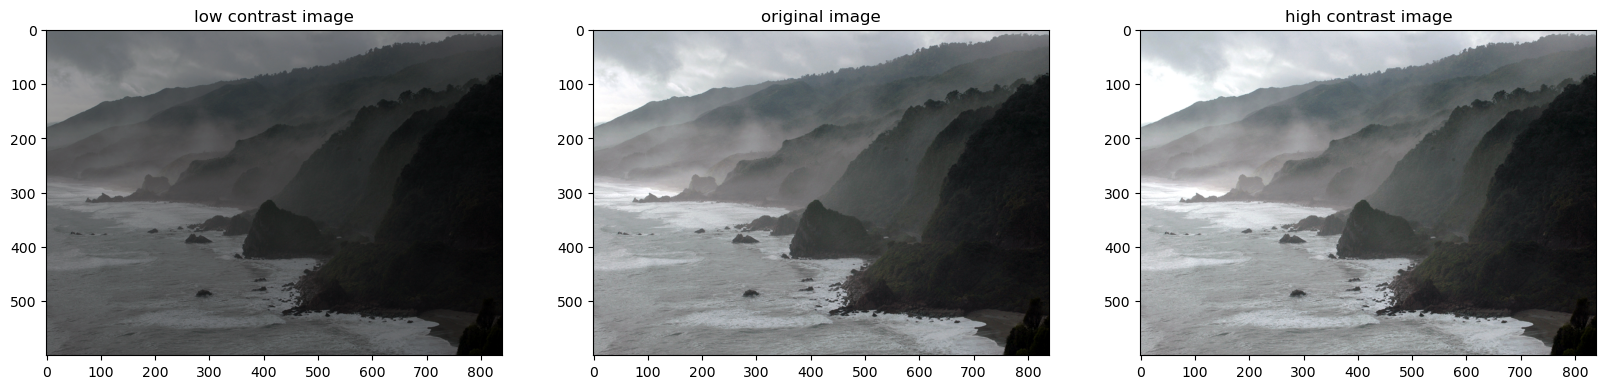

In [13]:
fig,ax = plt.subplots(1,3, figsize=[20,5])

ax[0].imshow(low_contrast_img)
ax[0].set_title('low contrast image')
ax[1].imshow(coast_img_rgb)
ax[1].set_title('original image')
ax[2].imshow(high_contrast_img1)
ax[2].set_title('high contrast image')

plt.show()

## Thresholding

In [7]:
building = cv.imread('building-windows.jpg', 0)

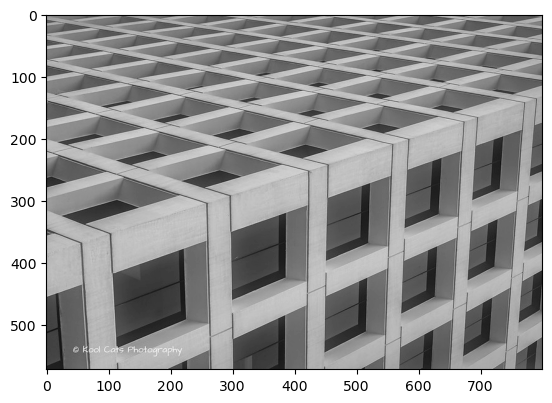

In [11]:
plt.imshow(building, cmap='gray');

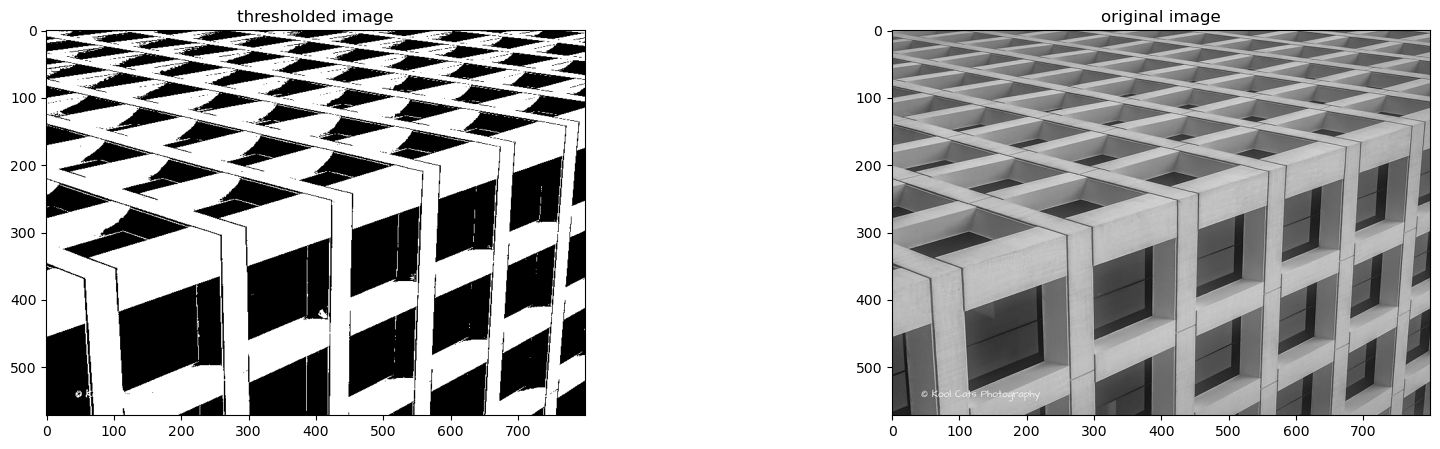

In [20]:
retval, dst = cv.threshold(building, 125, 255, cv.THRESH_BINARY)

fig,ax = plt.subplots(1,2, figsize=[20,5])

ax[0].imshow(dst, cmap='gray')
ax[0].set_title('thresholded image')
ax[1].imshow(building,cmap='gray')
ax[1].set_title('original image')


plt.show()

In [17]:
retval

125.0

## Application: Sheet Music Reader



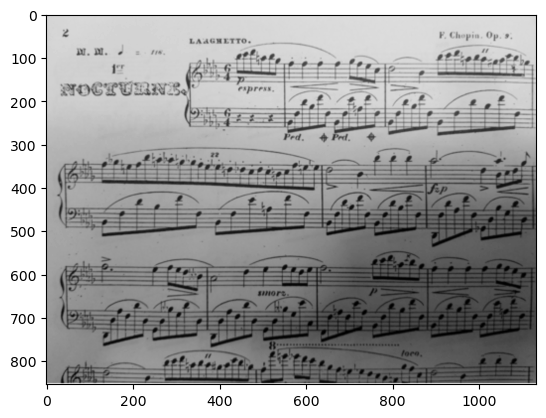

In [34]:
piano_sheet = cv.imread('Piano_Sheet_Music.png', 0)
plt.imshow(piano_sheet, cmap='gray');

In [37]:
# GLOBAL THRESHOLDING.
thresh_val, thresh_img = cv.threshold(piano_sheet, 50, 255, cv.THRESH_BINARY)

thresh_val1, thresh_img1 = cv.threshold(piano_sheet, 130, 255, cv.THRESH_BINARY)

In [38]:
# adaptive thresholding

adapt_thresh_img = cv.adaptiveThreshold(piano_sheet, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 7)

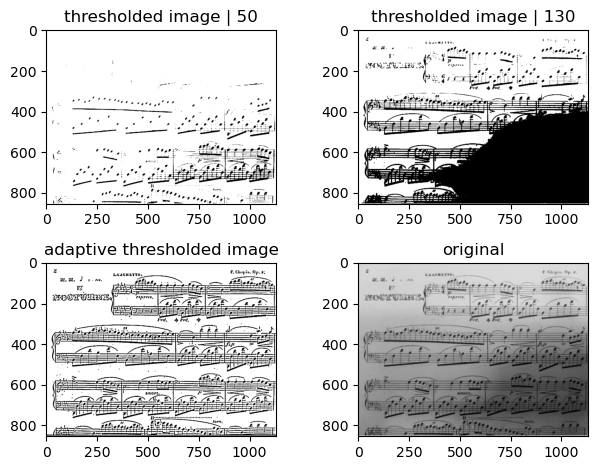

In [42]:
fig,ax = plt.subplots(2,2)

ax[0][0].imshow(thresh_img, cmap='gray')
ax[0][0].set_title('thresholded image | 50')

ax[0][1].imshow(thresh_img1, cmap='gray')
ax[0][1].set_title('thresholded image | 130')

ax[1][0].imshow(adapt_thresh_img,cmap='gray')
ax[1][0].set_title('adaptive thresholded image')

ax[1][1].imshow(piano_sheet, cmap='gray')
ax[1][1].set_title('original')
plt.tight_layout()
plt.show()

in the (0,0) image the thresholding did not provide any good enhancement,

in the (0,1) image the thresholding(130), 

In [46]:
print(piano_sheet.shape)

(854, 1132)


In [65]:
shadow = piano_sheet[400:800, 500:1000] #[height, width] height = y1,y2 weight = x1, x2

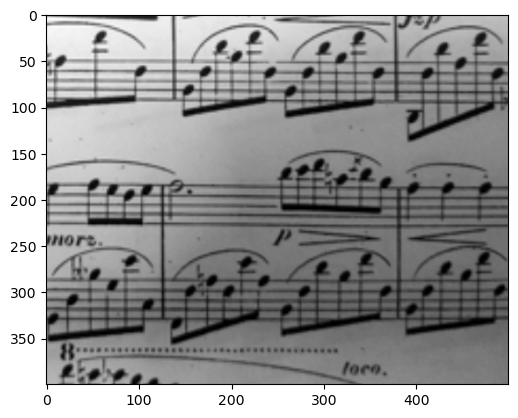

In [66]:
plt.imshow(shadow,cmap='gray');

In [70]:
shadow.max(), shadow.min(),shadow.mean()

(np.uint8(179), np.uint8(0), np.float64(90.01962))

## Bitwise Operations

### Function Syntax
Example API for cv2.bitwise_and(). Others include: cv2.bitwise_or(), cv2.bitwise_xor(), cv2.bitwise_not()

dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
dst: Output array that has the same size and type as the input arrays.

The function has 2 required arguments:

src1: first input array or a scalar.

src2: second input array or a scalar.

An important optional argument is:

mask: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

In [71]:
rect_img = cv.imread('rectangle.jpg', 0)
circle_img = cv.imread('circle.jpg', 0)

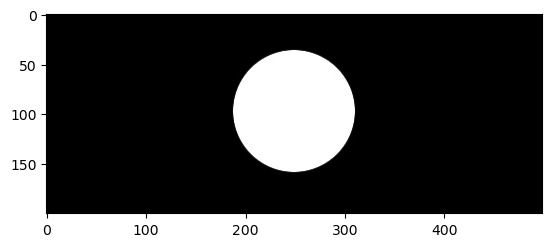

In [74]:
plt.imshow(circle_img, cmap='gray')

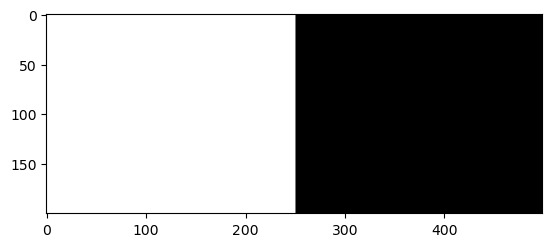

In [75]:
plt.imshow(rect_img, cmap='gray')

### Bitwise AND

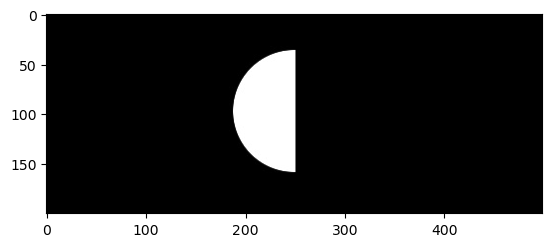

In [77]:
img_bitwise_and = cv.bitwise_and(rect_img, circle_img, mask=None)
plt.imshow(img_bitwise_and,cmap='gray');

pixels in rectangle multiplied with circle

### Bitwise OR

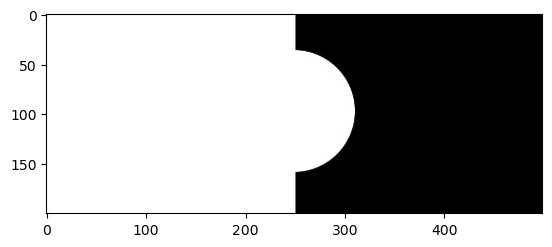

In [78]:
img_bitwise_or = cv.bitwise_or(rect_img, circle_img, mask=None)
plt.imshow(img_bitwise_or, cmap='gray');

pixels in the rectangle added with pixels in circle.

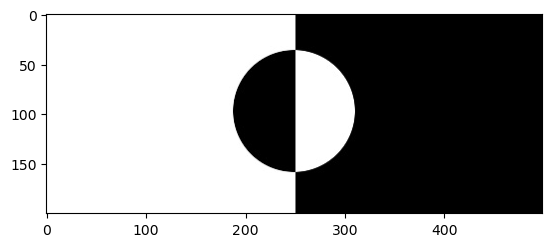

In [79]:
img_bitwise_or=cv.bitwise_xor(rect_img, circle_img, mask=None)
plt.imshow(img_bitwise_or, cmap='gray');

the zeros(black) pixel in rectangle, and not zero pixels(white) in circle formed white
the not zeros pixels in rectangle and zero pixels in rectangle(black area)  formed white.

### Application: Logo Manipulation

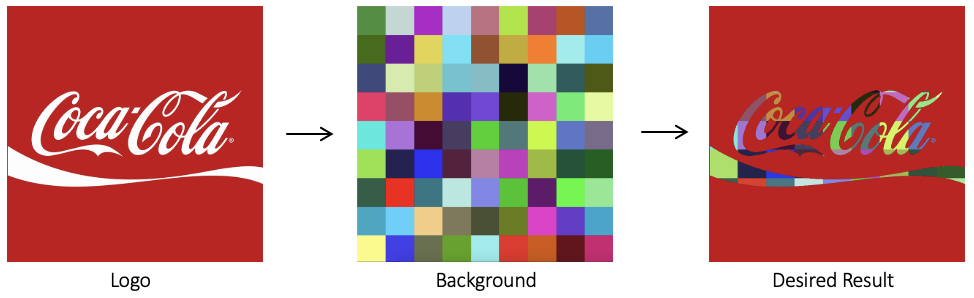

In [80]:
Image(filename='Logo_Manipulation.png')

#### Foreground image/ logo

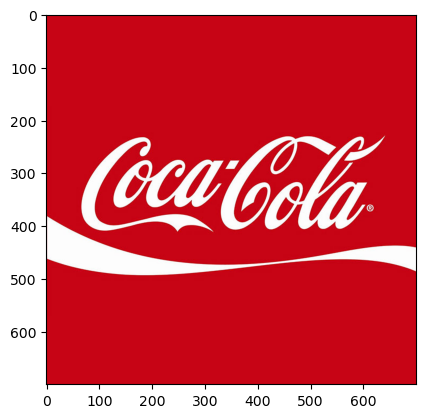

In [81]:
logo = cv.imread('coca-cola-logo.png')
logo_rgb = logo[:,:,::-1]
plt.imshow(logo_rgb);

In [82]:
logo_rgb.shape, logo_rgb.shape[0], logo_rgb.shape[1]

((700, 700, 3), 700, 700)

#### Background image

shape of original background (1800, 1800, 3)


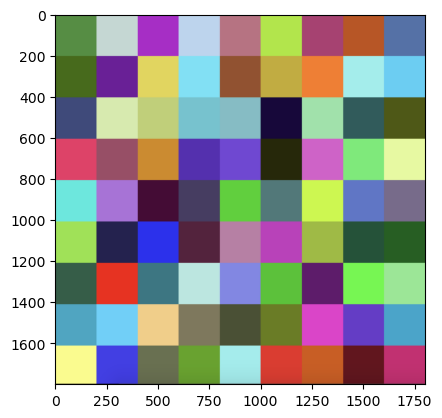

In [90]:
background = cv.imread('checkerboard_color.png')
background_rgb = background[:,:,::-1]

plt.imshow(background_rgb);
print(f"shape of original background {background_rgb.shape}")

shape of the resized background image (700, 700, 3)


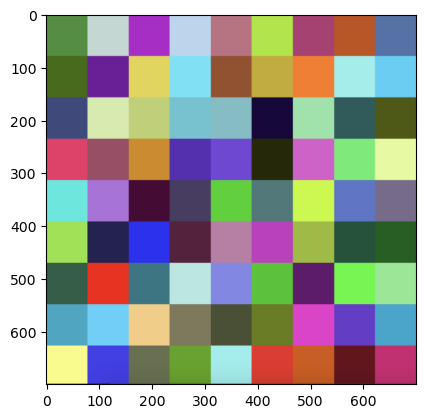

In [87]:
# setting aspect ratio
width = logo_rgb.shape[0]
height = logo_rgb.shape[1]

aspect_ratio = width/background_rgb.shape[1]

dimensions = (width, int(background_rgb.shape[0]*aspect_ratio))

# resizing the background to same size of logo
resized_bg_img = cv.resize(background_rgb, dimensions, interpolation=cv.INTER_AREA)

plt.imshow(resized_bg_img);
print(f"shape of the resized background image {resized_bg_img.shape}")

#### creating mask for original image

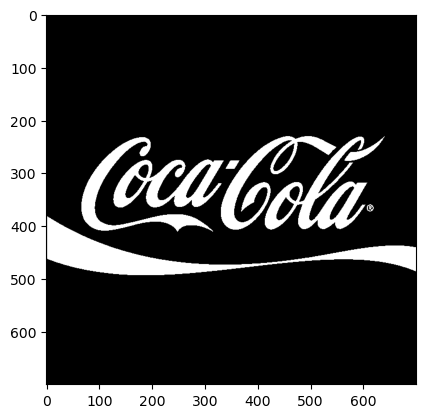

In [92]:
logo_gray = cv.cvtColor(logo_rgb, cv.COLOR_RGB2GRAY)

logo_thresh_value, logo_thresh_img = cv.threshold(logo_gray, 127, 255, cv.THRESH_BINARY)

plt.imshow(logo_thresh_img, cmap='gray');

#### invert the mask/apply not

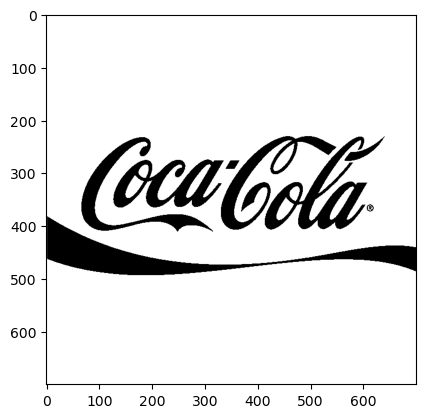

In [94]:
logo_thresh_img_inv = cv.bitwise_not(logo_thresh_img)
plt.imshow(logo_thresh_img_inv,cmap='gray');

#### apply resized background to thresholded logo

In [103]:
applied_bg_img = cv.bitwise_and(resized_bg_img, resized_bg_img,mask=logo_thresh_img)

check with only one src image,

check with two different src images keeping the mask same.

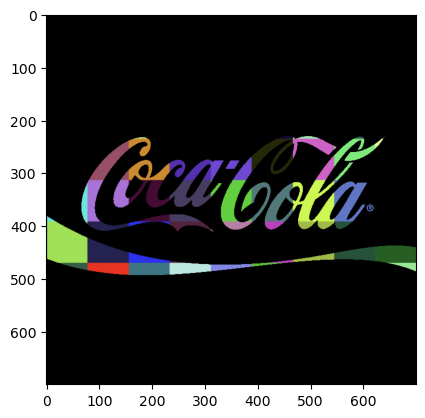

In [104]:
plt.imshow(applied_bg_img);

#### isolate foreground from image



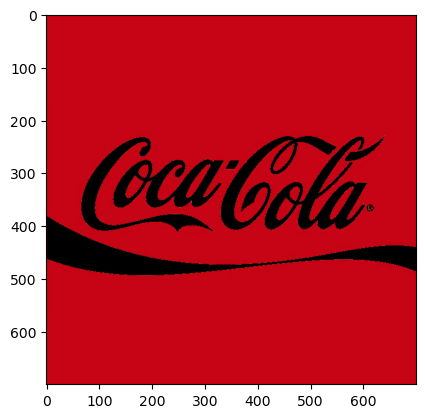

In [111]:
logo_foreground = cv.bitwise_and(logo_rgb, logo_rgb, mask=logo_thresh_img_inv)
plt.imshow(logo_foreground);

#### Result: merging foreground and background

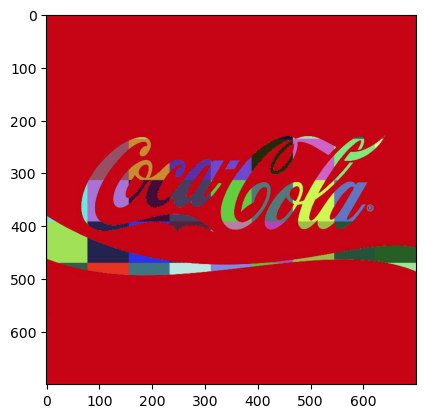

In [115]:
result = cv.add(applied_bg_img,logo_foreground)
plt.imshow(result);

## rough

Text(0.5, 1.0, '(700, 700, 3)')

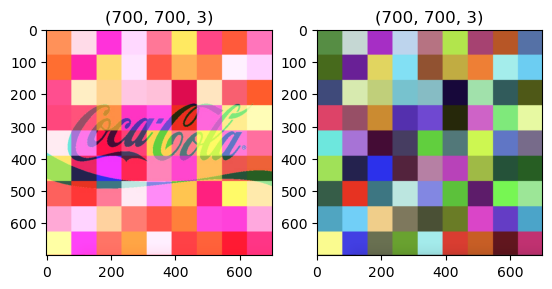

In [118]:
applied_bg_img1 = cv.add(resized_bg_img, logo_foreground)

fig,ax = plt.subplots(1,2)

ax[0].imshow(applied_bg_img1)
ax[0].set_title(str(applied_bg_img1.shape))
ax[1].imshow(resized_bg_img)
ax[1].set_title(str(resized_bg_img.shape))

Text(0.5, 1.0, '(700, 700, 3)')

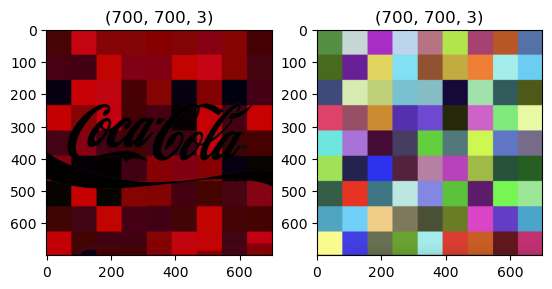

In [119]:
applied_bg_img1 = cv.bitwise_and(resized_bg_img, logo_foreground)

fig,ax = plt.subplots(1,2)

ax[0].imshow(applied_bg_img1)
ax[0].set_title(str(applied_bg_img1.shape))
ax[1].imshow(resized_bg_img)
ax[1].set_title(str(resized_bg_img.shape))